In [1]:
#installing and importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

!pip install miceforest
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn .metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import RandomizedSearchCV

In [2]:
#loading the csv datasets using Pandas
train = pd.read_csv('/content/training_set_features.csv')
test = pd.read_csv('/content/test_set_features.csv')
train_labels=pd.read_csv('/content/training_set_labels.csv')
submission=pd.read_csv('/content/submission_format.csv')

### Extrapolatory Data Analysis

In [3]:
train=train.drop("respondent_id", axis=1)

In [4]:
#Looking for NUll values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [5]:
#dropping columns with more than 30% null values
train=train.drop('health_insurance', axis=1)
train=train.drop('employment_industry', axis=1)
train=train.drop('employment_occupation', axis=1)

<Axes: >

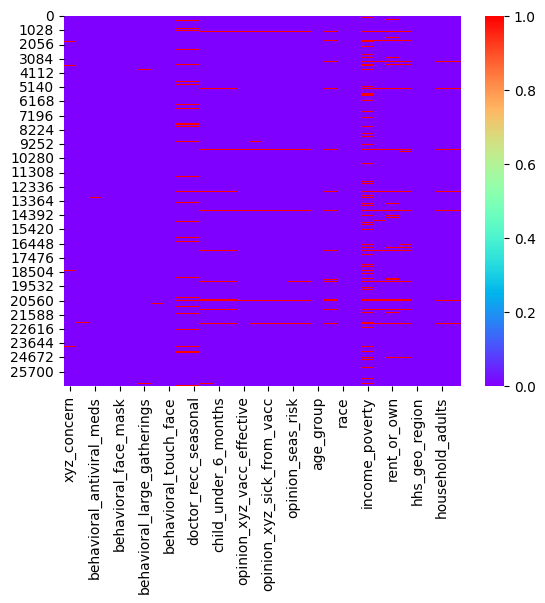

In [6]:
#plotting null values
sns.heatmap(train.isnull(), cbar=True, cmap="rainbow")

In [7]:
train.describe()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25887.000000,25903.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.082590,0.111918,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.275266,0.315271,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [8]:
#to check if middle columns contain null as we can view in the pandas dataframe
train["age_group"].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [9]:
#to calculate number of null values in a column
train.value_counts(train['age_group'].isnull()==True)

age_group
False    26707
Name: count, dtype: int64

##### Converting Categorical Variables to Numbers using Custom Maps and Label Encoder

In [10]:
#using Custom Maps

custom_map1 = {'55 - 64 Years' : 4,
               '35 - 44 Years':2,
               '18 - 34 Years':1,
               '65+ Years':5,
               '45 - 54 Years':3}
train['age_group'] = train['age_group']\
        .map(custom_map1)

custom_map2 = {'< 12 Years':1,
               '12 Years':2,
               'College Graduate':3,
               'Some College':4}
train['education'] = train['education'].map(custom_map2)

custom_map3 = {'White':1,
               'Black':2,
               'Other or Multiple':3,
               'Hispanic':4}
train['race'] = train['race'].map(custom_map3)

custom_map4 = {'Female':1, 'Male':0}
train['sex'] = train['sex'].map(custom_map4)

custom_map5 = {'Married': 1, 'Not Married': 0}
train['marital_status'] = train['marital_status'].map(custom_map5)

custom_map6 = {'Own': 1, 'Rent': 0}
train['rent_or_own'] = train['rent_or_own'].map(custom_map6)

custom_map7 = {'Below Poverty':1,
               '<= $75,000, Above Poverty':2,
               '> $75,000':3}
train['income_poverty'] = train['income_poverty']\
        .map(custom_map7)

custom_map8 = {'Not in Labor Force':1, 'Employed':2, 'Unemployed':3}
train['employment_status'] = train['employment_status']\
        .map(custom_map8)

In [11]:
train

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,1,1.0,0.0,1.0,1.0,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,1.0,0.0,0.0,2.0,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,0,2.0,0.0,1.0,2.0,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,1.0,0.0,0.0,1.0,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,1,2.0,1.0,1.0,2.0,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,2.0,0.0,1.0,1.0,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,2.0,0.0,0.0,2.0,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,1,NaN,0.0,1.0,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,4,1,2.0,1.0,0.0,2.0,lrircsnp,Non-MSA,1.0,0.0


In [12]:
#using label encoder

le = LabelEncoder()
train['hhs_geo_region'] = le.fit_transform(
    train['hhs_geo_region'])

train['census_msa'] = le.fit_transform(
    train['census_msa'])

In [13]:
#applying same steps on the test data

#dropping columns
test=test.drop('health_insurance', axis=1)
test=test.drop('employment_industry', axis=1)
test=test.drop('employment_occupation', axis=1)
test=test.drop('respondent_id',axis=1)

#handling categorial data in test

custom_map1 = {'55 - 64 Years' : 4,
               '35 - 44 Years':2,
               '18 - 34 Years':1,
               '65+ Years':5,
              '45 - 54 Years':3}
test['age_group'] = test['age_group']\
    .map(custom_map1)

custom_map2 = {'< 12 Years':1,
            '12 Years':2,
            'College Graduate':3,
            'Some College':4}
test['education'] = test['education']\
    .map(custom_map2)

custom_map3 = {'White':1, 'Black':2, 'Other or Multiple':3, 'Hispanic':4}
test['race'] = test['race']\
    .map(custom_map3)

custom_map4 = {'Female':1, 'Male':0}
test['sex'] = test['sex']\
    .map(custom_map4)

custom_map5 = {'Married': 1, 'Not Married': 0}
test['marital_status'] = test['marital_status']\
    .map(custom_map5)

custom_map6 = {'Own': 1, 'Rent': 0}
test['rent_or_own'] = test['rent_or_own']\
    .map(custom_map6)

custom_map7 = {'Below Poverty':1, '<= $75,000, Above Poverty':2, '> $75,000':3}
test['income_poverty'] = test['income_poverty']\
    .map(custom_map7)

custom_map8 = {'Not in Labor Force':1, 'Employed':2, 'Unemployed':3}
test['employment_status'] = test['employment_status']\
    .map(custom_map8)

le = LabelEncoder()

test['hhs_geo_region'] = le.fit_transform(
  test['hhs_geo_region'])

test['census_msa'] = le.fit_transform(
  test['census_msa'])

In [14]:
test

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4,1,3.0,0.0,0.0,2.0,7,0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.0,0.0,0.0,2.0,1,2,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1,0,3.0,1.0,1.0,2.0,5,2,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,2.0,1.0,1.0,1.0,5,0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2,1,2.0,0.0,1.0,2.0,6,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,1,NaN,NaN,NaN,NaN,2,1,1.0,1.0
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,1.0,1.0,0.0,2.0,9,2,1.0,3.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1.0,0.0,0.0,1.0,9,0,1.0,0.0
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,2.0,1.0,1.0,1.0,1,0,1.0,0.0


##### **MICE** technique **(Multivariate Imputation by Chained Equations)** will be used to fill the missing values

In [15]:
from miceforest import ImputationKernel

#filling the missing values in train
mice_kernel_train = ImputationKernel(data = train,
                               save_all_iterations = True,
                               random_state = 42)
mice_kernel_train.mice(10) #running for 10 iterations
mice_imputation_train = mice_kernel_train.complete_data()

In [16]:
#filling missing values in test
mice_kernel_test = ImputationKernel(data = test,
                               save_all_iterations = True,
                               random_state = 42)
mice_kernel_test.mice(10) #running for 10 iterations
mice_imputation_test = mice_kernel_test.complete_data()


In [17]:
mice_imputation_train.corr()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
xyz_concern,1.000000,0.062474,0.090231,0.234614,0.156042,0.293120,0.254372,0.246446,0.247522,0.148402,...,0.101488,0.126370,-0.060829,0.029264,-0.004029,-0.022548,-0.009100,0.003310,-0.015295,0.050060
xyz_knowledge,0.062474,1.000000,-0.010827,0.089626,0.029379,0.090956,-0.049126,-0.067529,0.086294,0.094176,...,-0.115372,0.066881,0.256199,0.134492,0.133653,0.077003,-0.016961,-0.060394,0.023175,0.048027
behavioral_antiviral_meds,0.090231,-0.010827,1.000000,0.049678,0.146632,0.064385,0.105788,0.127133,0.070370,0.049066,...,0.130845,0.006267,-0.067901,-0.011069,-0.066969,0.025238,0.008856,0.012268,0.044999,0.083613
behavioral_avoidance,0.234614,0.089626,0.049678,1.000000,0.064893,0.338036,0.227285,0.219159,0.337058,0.066545,...,-0.002940,0.113347,0.032399,0.054280,0.034582,-0.000239,-0.000290,-0.031898,0.019137,0.040723
behavioral_face_mask,0.156042,0.029379,0.146632,0.064893,1.000000,0.083238,0.180510,0.163906,0.104502,0.079546,...,0.098387,0.049640,-0.062767,-0.007027,-0.051244,-0.021333,0.009524,-0.003938,0.015184,0.005871
behavioral_wash_hands,0.293120,0.090956,0.064385,0.338036,0.083238,1.000000,0.195420,0.192637,0.364013,0.089582,...,0.047690,0.156804,0.005682,0.043740,0.017330,-0.017018,-0.006886,-0.017424,0.008659,0.047072
behavioral_large_gatherings,0.254372,-0.049126,0.105788,0.227285,0.180510,0.195420,1.000000,0.583597,0.254419,0.080008,...,0.103678,0.055828,-0.164967,-0.026830,-0.052378,-0.092398,0.011566,0.037152,-0.031531,-0.008648
behavioral_outside_home,0.246446,-0.067529,0.127133,0.219159,0.163906,0.192637,0.583597,1.000000,0.268108,0.067763,...,0.109476,0.039001,-0.183630,-0.029587,-0.072377,-0.091771,0.014092,0.028528,-0.027447,-0.009026
behavioral_touch_face,0.247522,0.086294,0.070370,0.337058,0.104502,0.364013,0.254419,0.268108,1.000000,0.086883,...,0.036308,0.163485,-0.036732,0.028327,0.015870,-0.023964,-0.005748,0.005625,-0.001389,0.024082
doctor_recc_xyz,0.148402,0.094176,0.049066,0.066545,0.079546,0.089582,0.080008,0.067763,0.086883,1.000000,...,0.020132,0.042283,0.007425,0.023314,-0.003479,-0.040420,-0.023520,-0.005077,0.003380,0.029200


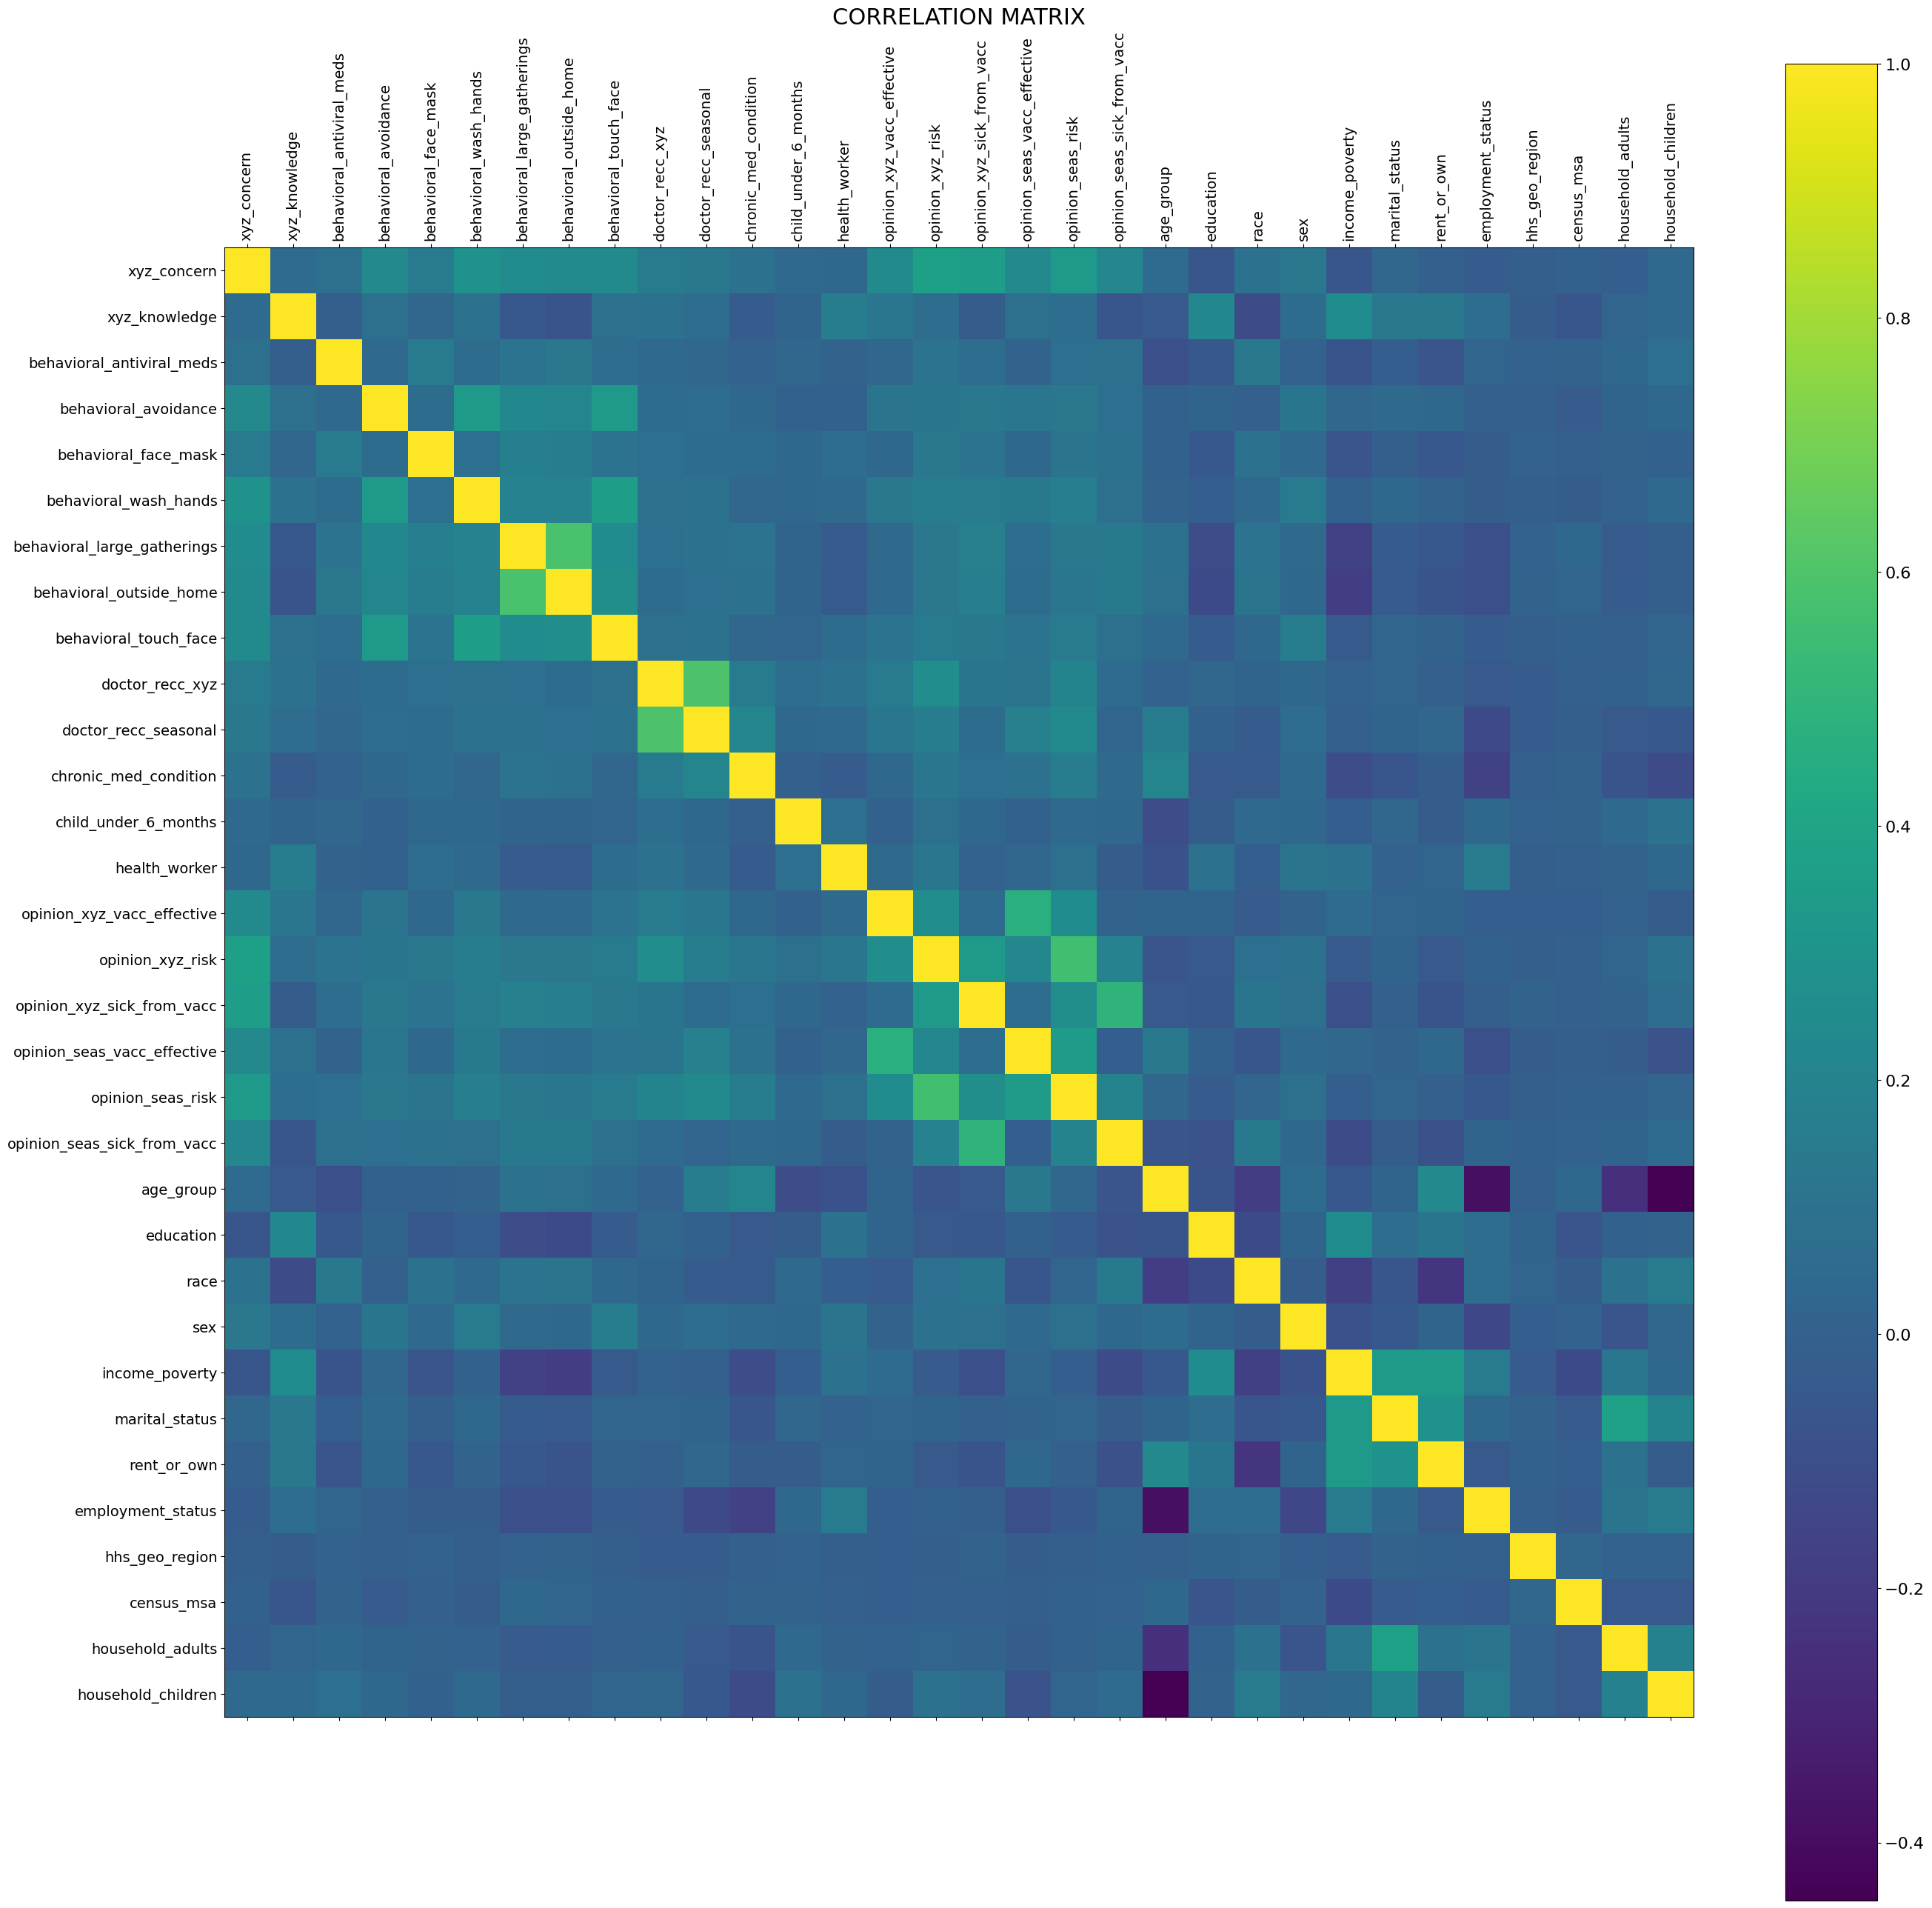

In [18]:
#to visulaize the correlation matrix

f = plt.figure(figsize=(32, 32))
plt.matshow(mice_imputation_train.corr(), fignum=f.number)
plt.xticks(range(mice_imputation_train.select_dtypes(['number']).shape[1]), mice_imputation_train.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(mice_imputation_train.select_dtypes(['number']).shape[1]), mice_imputation_train.select_dtypes(['number']).columns, fontsize=14,rotation=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('CORRELATION MATRIX', fontsize=22);

### Training the Model

In [19]:
train_labels=train_labels.drop('respondent_id',axis=1)

In [20]:
#implementing the test train split
X_train, X_test, y_train, y_test = train_test_split(mice_imputation_train,train_labels,
                                   random_state=345,
                                   test_size=0.25,
                                   shuffle=True)

##### Hyperparameter tuning for random forrest regressor

In [21]:
#training the model on a Random Forrest Regressor model
rfregressor=RandomForestRegressor(criterion="poisson", random_state=345,
                                  min_samples_split=60)
rfregressor.fit(X_train,y_train)

#rfregressor.predict(X_test)

RandomForestRegressor(criterion='poisson', min_samples_split=60,
                      random_state=345)

In [22]:
#training with the multiple output Random Forrest Regressor
mulregressor=MultiOutputRegressor(rfregressor)
mulregressor.fit(X_train,y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(criterion='poisson',
                                                     min_samples_split=60,
                                                     random_state=345))

In [23]:
predictions=mulregressor.predict(X_test)
y_pred=pd.DataFrame(predictions, columns=['xyz_vaccine', 'seasonal_vaccine'])

In [24]:
y_pred

,xyz_vaccine,seasonal_vaccine
0,0.163779,0.708936
1,0.032520,0.139486
2,0.686885,0.926059
3,0.368809,0.334806
4,0.052541,0.876070
...,...,...
6672,0.093832,0.708442
6673,0.098052,0.791987
6674,0.666942,0.754955
6675,0.457048,0.869275


In [25]:
#calculating the roc_auc score on train-test split data

roc_auc_score(y_test, y_pred)

0.8341831363074049

In [26]:
result= mulregressor.predict(mice_imputation_test)
results=pd.DataFrame(result, columns=['xyz_vaccine', 'seasonal_vaccine'])
results

,xyz_vaccine,seasonal_vaccine
0,0.119152,0.143250
1,0.026254,0.020877
2,0.590937,0.826862
3,0.527464,0.837964
4,0.324396,0.496605
...,...,...
26703,0.319407,0.414201
26704,0.217259,0.263256
26705,0.086535,0.226661
26706,0.036663,0.395280


In [27]:
#converting to the necessary format with respondent_id's

submission["h1n1_vaccine"]=results["xyz_vaccine"]
submission["seasonal_vaccine"]=results["seasonal_vaccine"]
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.119152,0.143250
1,26708,0.026254,0.020877
2,26709,0.590937,0.826862
3,26710,0.527464,0.837964
4,26711,0.324396,0.496605
...,...,...,...
26703,53410,0.319407,0.414201
26704,53411,0.217259,0.263256
26705,53412,0.086535,0.226661
26706,53413,0.036663,0.395280


In [28]:
#renaming the column from h1n1 to xyz_vaccine

submission.rename(columns = {'h1n1_vaccine':'xyz_vaccine'}, inplace = True)
submission

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.119152,0.143250
1,26708,0.026254,0.020877
2,26709,0.590937,0.826862
3,26710,0.527464,0.837964
4,26711,0.324396,0.496605
...,...,...,...
26703,53410,0.319407,0.414201
26704,53411,0.217259,0.263256
26705,53412,0.086535,0.226661
26706,53413,0.036663,0.395280


In [30]:
#converting submission to a csv file

submission.to_csv("submissions.csv")